In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

In [2]:
data=pd.read_csv('train.csv')

In [6]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,Male,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,Female,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,Male,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [467]:
from sklearn.preprocessing import LabelEncoder

In [468]:
genderle=LabelEncoder()

In [469]:
data['Gender']=genderle.fit_transform(data['Gender'])

In [470]:
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,60,1,6.3,3.2,314,118,114,6.6,3.7,1.27,1
1,31,0,0.8,0.2,158,21,16,6.0,3.0,1.00,1
2,60,1,19.6,9.5,466,46,52,6.1,2.0,0.40,1
3,34,1,8.7,4.0,298,58,138,5.8,2.4,0.70,1
4,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,1


In [471]:
data=data.dropna()

In [484]:
feature_cols=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']



In [485]:
X=data[feature_cols]

In [361]:
X.head()
X.shape


(463, 6)

In [362]:
y=data['Dataset']


In [363]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [367]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [368]:
def get_score(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [369]:
from sklearn.model_selection import cross_val_score

In [370]:
score_lr=[]
score_svc=[]
score_rf=[]
score_dt=[]
score_nb=[]
score_sgd=[]
score_knn=[]

In [495]:
score_lr.append(cross_val_score(LogisticRegression(),X,y))

score_lr

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[array([0.7254902 , 0.66013072, 0.75816993]),
 array([0.7254902 , 0.67320261, 0.75163399])]

In [372]:
score_svc.append(cross_val_score(SVC(),X,y))

score_svc

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/sv

[array([0.70967742, 0.71428571, 0.71428571])]

In [373]:
score_rf.append(cross_val_score(RandomForestClassifier(n_estimators=40),X,y))
score_rf

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[array([0.64516129, 0.7012987 , 0.68831169])]

In [374]:
score_dt.append(cross_val_score(tree.DecisionTreeClassifier(),X,y))
score_dt

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[array([0.66451613, 0.64935065, 0.68831169])]

In [375]:
score_nb.append(cross_val_score(GaussianNB(),X,y))
score_nb

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[array([0.6       , 0.57142857, 0.49350649])]

In [376]:
score_sgd.append(cross_val_score(SGDClassifier(),X,y))
score_sgd

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=10

[array([0.71612903, 0.71428571, 0.72077922])]

In [377]:
score_knn.append(cross_val_score(KNeighborsClassifier(),X,y))
score_knn

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[array([0.74193548, 0.68181818, 0.68831169])]

## Logistic Regression gives best results

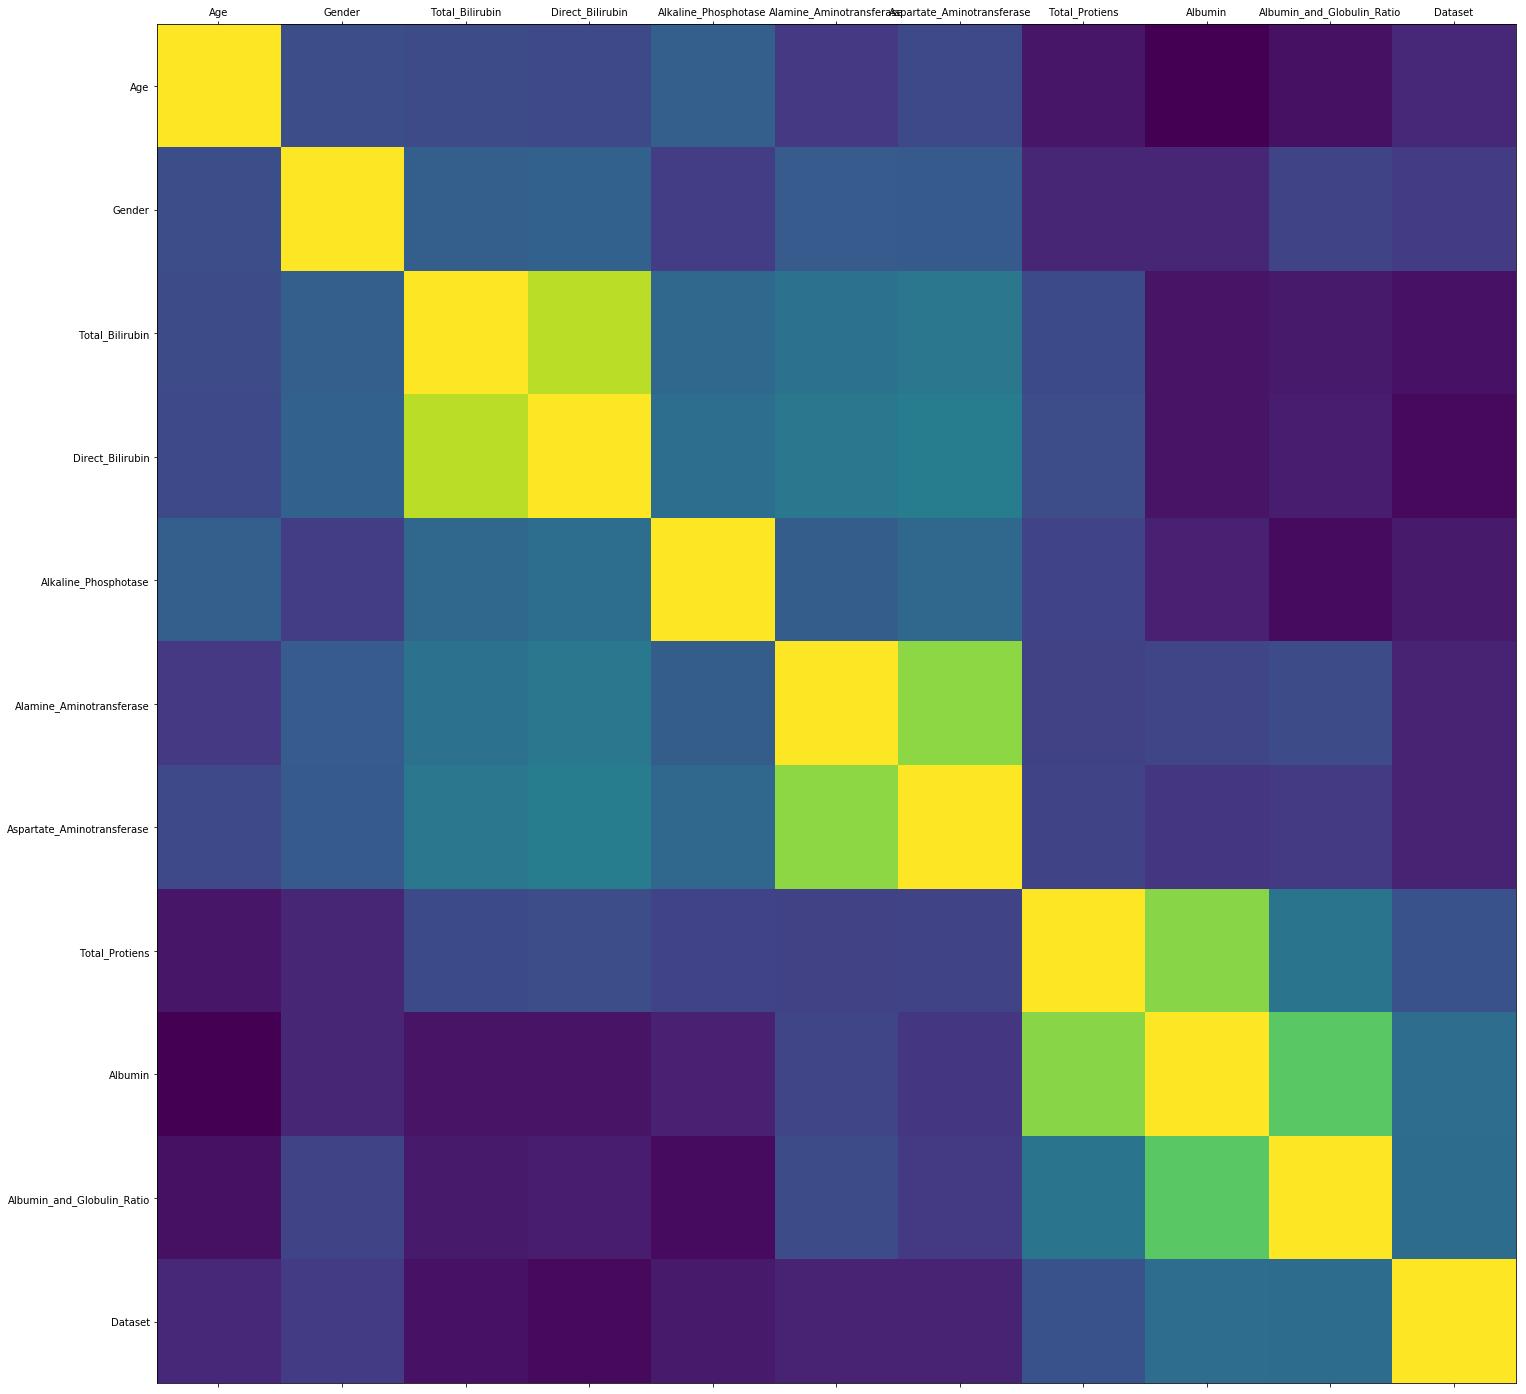

In [378]:
# plotting a correlation matrix 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25,25))
ax.matshow(data.corr())


plt.xticks(range(len(data.columns)), data.columns);
plt.yticks(range(len(data.columns)), data.columns);
plt.show()

In [500]:
#dropping columns with high correlation

feature_cols=['Age','Gender','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin_and_Globulin_Ratio']

In [446]:
data=pd.read_csv('train.csv').dropna()

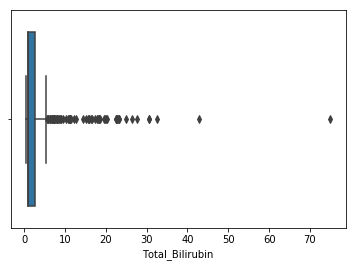

In [447]:
sns.boxplot(x=data['Total_Bilirubin'])

In [448]:
data=data.query("Total_Bilirubin<40")

In [449]:
data.shape

(461, 11)

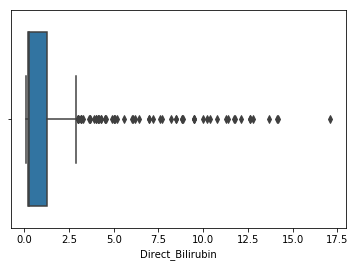

In [450]:
sns.boxplot(x=data['Direct_Bilirubin'])

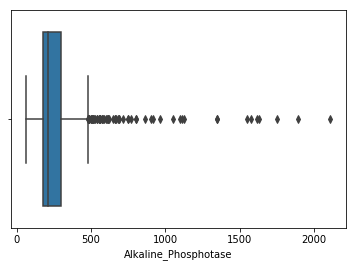

In [451]:
sns.boxplot(x=data['Alkaline_Phosphotase'])

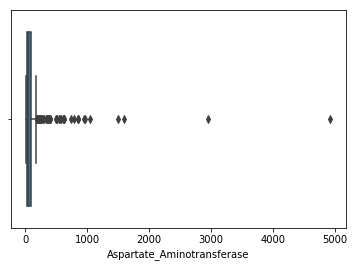

In [452]:
sns.boxplot(x=data['Aspartate_Aminotransferase'])

In [453]:
data=data.query("Aspartate_Aminotransferase<2000")

In [454]:
data.shape

(459, 11)

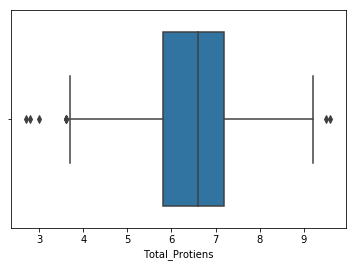

In [455]:
sns.boxplot(x=data['Total_Protiens'])

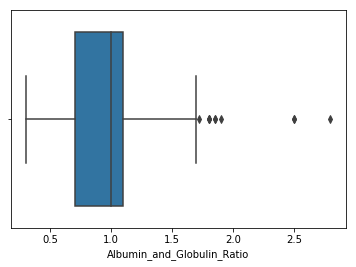

In [456]:
sns.boxplot(data['Albumin_and_Globulin_Ratio'])

In [457]:
data.shape

(459, 11)

In [633]:
X=data[feature_cols]
y=data['Dataset']

logreg=LogisticRegression()
data.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1,test_size=0.15)

logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8115942028985508

In [634]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)


/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7536231884057971

In [635]:
score_lr=[]
score_lr.append(cross_val_score(LogisticRegression(),X,y))

score_lr

/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rheachandok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[array([0.73202614, 0.66013072, 0.74509804])]

In [631]:
data['mu1']=data['Albumin']*data['Albumin_and_Globulin_Ratio']


In [632]:
feature_cols=['Age','Gender','Total_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin_and_Globulin_Ratio','mu1']

In [567]:
test_data=pd.read_csv('test.csv')

In [607]:

test_data=test_data.dropna()

test_data['Gender']=genderle.fit_transform(test_data['Gender'])

In [608]:
test_data['mu1']=test_data['Albumin']*test_data['Albumin_and_Globulin_Ratio']

In [609]:
test_data.shape

(116, 11)

In [610]:
XTest=test_data[feature_cols]


In [611]:
ypredict=logreg.predict(XTest)

In [614]:
ypredict

array([1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1])

In [615]:
test_data['Dataset']=ypredict

In [616]:
test_data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,mu1,Dataset
0,46,1,0.8,0.2,160,31,40,7.3,3.8,1.10,4.180,1
1,15,1,0.8,0.2,380,25,66,6.1,3.7,1.50,5.550,2
2,66,0,4.2,2.1,159,15,30,7.1,2.2,0.40,0.880,1
3,32,1,0.6,0.1,237,45,31,7.5,4.3,1.34,5.762,2
4,60,1,2.6,1.2,171,42,37,5.4,2.7,1.00,2.700,1
5,66,0,0.7,0.2,162,24,20,6.4,3.2,1.00,3.200,1
6,45,0,3.5,1.5,189,63,87,5.6,2.9,1.00,2.900,1
7,38,1,1.8,0.8,342,168,441,7.6,4.4,1.30,5.720,1
8,32,1,12.7,8.4,190,28,47,5.4,2.6,0.90,2.340,1
9,55,1,1.8,9.0,272,22,79,6.1,2.7,0.70,1.890,1


In [617]:
test_data.to_csv('Problem1.csv')